# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

In [3]:
cities_df = pd.DataFrame({"City":cities})

cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

#cities_df = cities_df.head(60)
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,,,,,,,,
1,rikitea,,,,,,,,
2,chimore,,,,,,,,
3,kodiak,,,,,,,,
4,yellowknife,,,,,,,,


In [4]:
len(cities_df)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"
set_index = 1

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    #get the weather record for each city
    city = row['City']
    
    i = (index // 50)
    if i >= 1:
        set_index = i + 1
    
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url).json()
        print(f"Processing Record {index} of set index {set_index} | {city}.")
        
        cities_df.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        cities_df.loc[index, 'Country'] = weather_response['sys']['country']
        cities_df.loc[index, 'Date'] = weather_response['dt']
        cities_df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        cities_df.loc[index, 'Lat'] = weather_response['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weather_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    

Processing Record 0 of set index 1 | puerto ayora.
Processing Record 1 of set index 1 | rikitea.
Processing Record 2 of set index 1 | chimore.
Processing Record 3 of set index 1 | kodiak.
Processing Record 4 of set index 1 | yellowknife.
Processing Record 5 of set index 1 | portobelo.
Processing Record 6 of set index 1 | bredasdorp.
Processing Record 7 of set index 1 | kemijarvi.
City not found. Skipping...
Processing Record 8 of set index 1 | punta arenas.
Processing Record 9 of set index 1 | riyadh.
Processing Record 10 of set index 1 | beringovskiy.
Processing Record 11 of set index 1 | faanui.
Processing Record 12 of set index 1 | severo-yeniseyskiy.
Processing Record 13 of set index 1 | nenjiang.
Processing Record 14 of set index 1 | tuktoyaktuk.
Processing Record 15 of set index 1 | hailar.
Processing Record 16 of set index 1 | geraldton.
Processing Record 17 of set index 1 | luderitz.
Processing Record 18 of set index 1 | hilo.
Processing Record 19 of set index 1 | barrow.
Proce

Processing Record 163 of set index 4 | williams lake.
Processing Record 164 of set index 4 | ahuimanu.
Processing Record 165 of set index 4 | north las vegas.
Processing Record 166 of set index 4 | chuy.
Processing Record 167 of set index 4 | visby.
Processing Record 168 of set index 4 | cootamundra.
Processing Record 169 of set index 4 | verkh-usugli.
Processing Record 170 of set index 4 | sinop.
Processing Record 171 of set index 4 | hasaki.
Processing Record 172 of set index 4 | severo-kurilsk.
Processing Record 173 of set index 4 | dikson.
Processing Record 174 of set index 4 | klaksvik.
Processing Record 175 of set index 4 | khatanga.
Processing Record 176 of set index 4 | georgetown.
Processing Record 177 of set index 4 | svetlyy.
City not found. Skipping...
Processing Record 178 of set index 4 | phulji.
Processing Record 179 of set index 4 | balakovo.
Processing Record 180 of set index 4 | tautira.
Processing Record 181 of set index 4 | qasigiannguit.
Processing Record 182 of se

Processing Record 319 of set index 7 | gualaquiza.
Processing Record 320 of set index 7 | fairbanks.
Processing Record 321 of set index 7 | kupang.
Processing Record 322 of set index 7 | yanchukan.
City not found. Skipping...
Processing Record 323 of set index 7 | suamico.
Processing Record 324 of set index 7 | kurmanayevka.
Processing Record 325 of set index 7 | kijang.
Processing Record 326 of set index 7 | cleveland.
Processing Record 327 of set index 7 | hirara.
Processing Record 328 of set index 7 | heinola.
Processing Record 329 of set index 7 | serebryansk.
Processing Record 330 of set index 7 | rio grande.
Processing Record 331 of set index 7 | caravelas.
Processing Record 332 of set index 7 | tieling.
Processing Record 333 of set index 7 | atar.
Processing Record 334 of set index 7 | isangel.
Processing Record 335 of set index 7 | anadyr.
Processing Record 336 of set index 7 | tromso.
Processing Record 337 of set index 7 | tura.
Processing Record 338 of set index 7 | qaanaaq.


Processing Record 474 of set index 10 | liwale.
Processing Record 475 of set index 10 | darnetal.
Processing Record 476 of set index 10 | kultuk.
Processing Record 477 of set index 10 | korla.
City not found. Skipping...
Processing Record 478 of set index 10 | itaituba.
Processing Record 479 of set index 10 | warqla.
City not found. Skipping...
Processing Record 480 of set index 10 | aasiaat.
Processing Record 481 of set index 10 | syracuse.
Processing Record 482 of set index 10 | ijaki.
City not found. Skipping...
Processing Record 483 of set index 10 | ordzhonikidze.
Processing Record 484 of set index 10 | samusu.
City not found. Skipping...
Processing Record 485 of set index 10 | kuruman.
Processing Record 486 of set index 10 | liverpool.
Processing Record 487 of set index 10 | siutu.
City not found. Skipping...
Processing Record 488 of set index 10 | sinnamary.
Processing Record 489 of set index 10 | balotra.
Processing Record 490 of set index 10 | blois.
Processing Record 491 of s

In [6]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,32,EC,1554424634,100,-0.74,-90.35,25.97,0.81
1,rikitea,0,PF,1554424688,100,-23.12,-134.97,24.77,7.36
2,chimore,80,BO,1554424689,94,-16.98,-65.13,23.42,1.41
3,kodiak,90,US,1554424623,47,39.95,-94.76,13.33,1.5
4,yellowknife,20,CA,1554424467,51,62.45,-114.38,-11.11,6.7
5,portobelo,40,PA,1554424299,61,9.55,-79.65,28,2.6
6,bredasdorp,76,ZA,1554424291,71,-34.53,20.04,14,3.1
7,kemijarvi,,,,,,,,
8,punta arenas,75,CL,1554424350,75,-53.16,-70.91,7,4.1
9,riyadh,0,SA,1554422400,46,24.63,46.72,23,1.5


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df['Country'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Country'], inplace=True)
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,32,EC,1554424634,100,-0.74,-90.35,25.97,0.81
1,rikitea,0,PF,1554424688,100,-23.12,-134.97,24.77,7.36
2,chimore,80,BO,1554424689,94,-16.98,-65.13,23.42,1.41
3,kodiak,90,US,1554424623,47,39.95,-94.76,13.33,1.5
4,yellowknife,20,CA,1554424467,51,62.45,-114.38,-11.11,6.7
5,portobelo,40,PA,1554424299,61,9.55,-79.65,28,2.6
6,bredasdorp,76,ZA,1554424291,71,-34.53,20.04,14,3.1
8,punta arenas,75,CL,1554424350,75,-53.16,-70.91,7,4.1
9,riyadh,0,SA,1554422400,46,24.63,46.72,23,1.5
10,beringovskiy,80,RU,1554424623,100,63.05,179.32,-4.09,4.91


In [8]:
cities_df.to_csv(output_data_file, encoding='utf-8', index=False)

In [9]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,32,EC,1554424634,100,-0.74,-90.35,25.97,0.81
1,rikitea,0,PF,1554424688,100,-23.12,-134.97,24.77,7.36
2,chimore,80,BO,1554424689,94,-16.98,-65.13,23.42,1.41
3,kodiak,90,US,1554424623,47,39.95,-94.76,13.33,1.5
4,yellowknife,20,CA,1554424467,51,62.45,-114.38,-11.11,6.7


In [10]:
cities_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

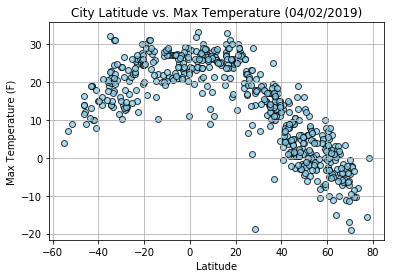

In [11]:
x_axis = cities_df["Lat"]
y_axis = cities_df["Max Temp"]
plt.title("City Latitude vs. Max Temperature (04/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.scatter(x_axis, y_axis,marker='o',edgecolors='black',c='skyblue',alpha=0.75)
plt.savefig("Lat_vs_Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

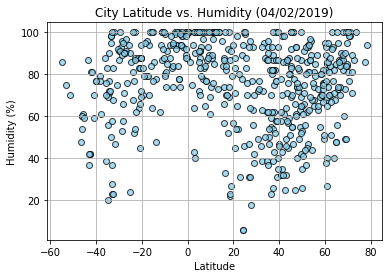

In [12]:
x_axis = cities_df["Lat"]
y_axis = cities_df["Humidity"]
plt.title("City Latitude vs. Humidity (04/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.scatter(x_axis, y_axis,marker='o',edgecolors='black',c='skyblue',alpha=0.75)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

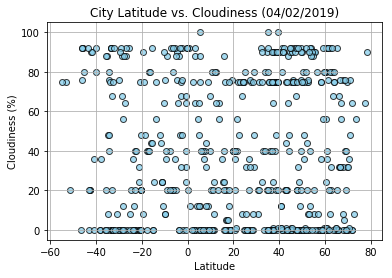

In [13]:
x_axis = cities_df["Lat"]
y_axis = cities_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness (04/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.scatter(x_axis, y_axis,marker='o',edgecolors='black',c='skyblue',alpha=0.75)
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

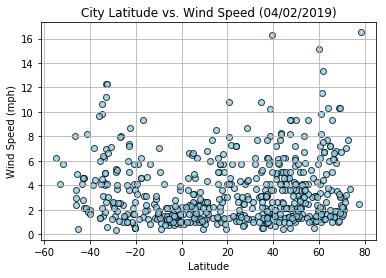

In [14]:
x_axis = cities_df["Lat"]
y_axis = cities_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed (04/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.scatter(x_axis, y_axis,marker='o',edgecolors='black',c='skyblue',alpha=0.75)
plt.savefig("Lat_vs_Wind_Speed.png")
plt.show()